In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("seattleWeather_1948-2017.csv")

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
data = raw_data.drop("DATE",axis=1)
data["TAVG"]=(data["TMAX"]+data["TMIN"])/2
data =  data.drop("PRCP", axis=1)
data = data.drop("RAIN", axis=1)
data

,TMAX,TMIN,TAVG
0,51,42,46.5
1,45,36,40.5
2,45,35,40.0
3,45,34,39.5
4,45,32,38.5
...,...,...,...
25546,49,34,41.5
25547,49,29,39.0
25548,46,32,39.0
25549,48,34,41.0


Now let us import the processed data

In [6]:
pred_min = np.load("Min_Temp_pred.npy")
y_min = np.load("Min_Temp_y.npy")
pred_max = np.load("Max_Temp_pred.npy")
y_max = np.load("Max_Temp_y.npy")
pred_avg = np.load("Avg_Temp_pred.npy")
y_avg = np.load("Avg_Temp_y.npy")

Now let us train the scalers

In [7]:
tmin = data.drop("TMAX", axis=1)
tmin = tmin.drop("TAVG", axis=1)
tmin

,TMIN
0,42
1,36
2,35
3,34
4,32
...,...
25546,34
25547,29
25548,32
25549,34


In [8]:
scaler.fit(tmin)

StandardScaler(copy=True, with_mean=True, with_std=True)

And finally scale back the values

In [28]:
pred_min_scl = scaler.inverse_transform(pred_min)
y_min_scl = scaler.inverse_transform(y_min)

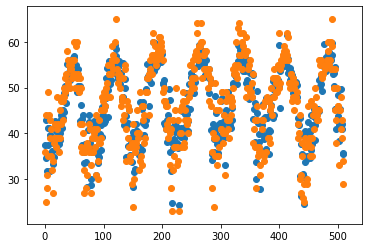

In [31]:
plt.scatter(range(len(pred_min_scl)), pred_min_scl)
plt.scatter(range(len(pred_min_scl)), y_min_scl)
plt.show()

Let us see a plot in Celcius

In [32]:
def cel(data):
    resul = (data-32)/1.8
    return resul

In [33]:
pred_min_cel = cel(pred_min_scl)
y_min_cel = cel(y_min_scl)

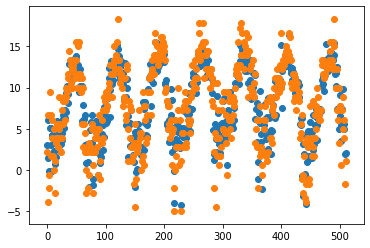

In [35]:
plt.scatter(range(len(pred_min_cel)), pred_min_cel)
plt.scatter(range(len(pred_min_cel)), y_min_cel)
plt.show()

And error of

In [38]:
import seaborn as sns

(array([ 2.,  0.,  0.,  0.,  0.,  3.,  3.,  0.,  5.,  9.,  7.,  7., 13.,
        15., 17., 20., 27., 22., 17., 25., 30., 44., 34., 28., 27., 39.,
        22., 20., 19., 13., 12.,  8.,  5.,  4.,  6.,  4.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-6.39913972, -6.10760915, -5.81607859, -5.52454802, -5.23301745,
        -4.94148688, -4.64995631, -4.35842574, -4.06689518, -3.77536461,
        -3.48383404, -3.19230347, -2.9007729 , -2.60924233, -2.31771177,
        -2.0261812 , -1.73465063, -1.44312006, -1.15158949, -0.86005892,
        -0.56852836, -0.27699779,  0.01453278,  0.30606335,  0.59759392,
         0.88912449,  1.18065505,  1.47218562,  1.76371619,  2.05524676,
         2.34677733,  2.6383079 ,  2.92983846,  3.22136903,  3.5128996 ,
         3.80443017,  4.09596074,  4.38749131,  4.67902187,  4.97055244,
         5.26208301,  5.55361358,  5.84514415,  6.13667472,  6.42820528,
         6.71973585,  7.01126642,  7.30279699,  7.59432756,

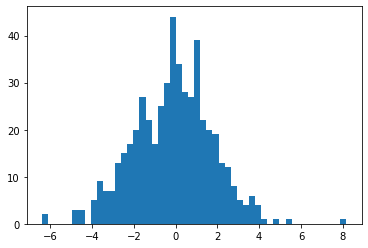

In [42]:
plt.hist(pred_min_cel-y_min_cel, bins = 50)

Let us also do for the other features

In [43]:
tmax = data.drop("TMIN", axis=1)
tmax = tmax.drop("TAVG", axis=1)

In [44]:
scaler.fit(tmax)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
pred_max_scl = scaler.inverse_transform(pred_max)
y_max_scl = scaler.inverse_transform(y_max)

In [46]:
pred_max_cel = cel(pred_max_scl)
y_max_cel = cel(y_max_scl)

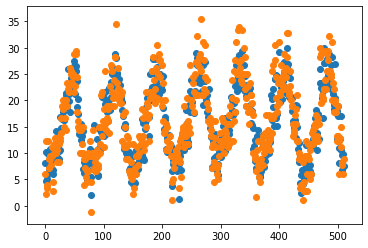

In [47]:
plt.scatter(range(len(pred_min_cel)), pred_max_cel)
plt.scatter(range(len(pred_min_cel)), y_max_cel)
plt.show()

(array([ 3.,  0.,  1.,  1.,  3.,  1.,  2.,  5.,  4.,  5.,  4., 13., 14.,
         5., 15., 22., 13., 24., 26., 29., 17., 25., 26., 21., 26., 22.,
        26., 23., 20., 13., 15., 17., 14.,  9.,  4.,  9.,  7.,  3.,  2.,
         5.,  5.,  3.,  3.,  1.,  1.,  0.,  1.,  1.,  0.,  2.]),
 array([-7.93430773, -7.6066763 , -7.27904487, -6.95141343, -6.623782  ,
        -6.29615057, -5.96851913, -5.6408877 , -5.31325627, -4.98562483,
        -4.6579934 , -4.33036197, -4.00273053, -3.6750991 , -3.34746767,
        -3.01983624, -2.6922048 , -2.36457337, -2.03694194, -1.7093105 ,
        -1.38167907, -1.05404764, -0.7264162 , -0.39878477, -0.07115334,
         0.2564781 ,  0.58410953,  0.91174096,  1.2393724 ,  1.56700383,
         1.89463526,  2.2222667 ,  2.54989813,  2.87752956,  3.205161  ,
         3.53279243,  3.86042386,  4.1880553 ,  4.51568673,  4.84331816,
         5.1709496 ,  5.49858103,  5.82621246,  6.1538439 ,  6.48147533,
         6.80910676,  7.1367382 ,  7.46436963,  7.79200106,

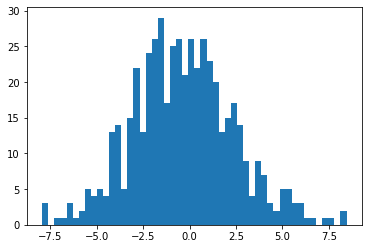

In [48]:
plt.hist(pred_max_cel-y_max_cel, bins = 50)

In [54]:
tavg = data.drop("TMAX", axis=1)
tavg = tavg.drop("TMIN", axis=1)
tavg

,TAVG
0,46.5
1,40.5
2,40.0
3,39.5
4,38.5
...,...
25546,41.5
25547,39.0
25548,39.0
25549,41.0


In [55]:
scaler.fit(tavg)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
pred_avg_scl = scaler.inverse_transform(pred_avg)
y_avg_scl = scaler.inverse_transform(y_avg)

In [57]:
pred_avg_cel = cel(pred_avg_scl)
y_avg_cel = cel(y_avg_scl)

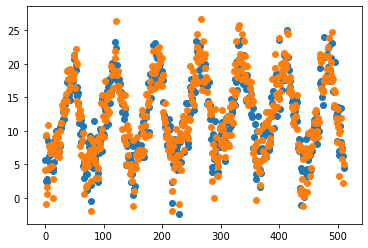

In [58]:
plt.scatter(range(len(pred_min_cel)), pred_avg_cel)
plt.scatter(range(len(pred_min_cel)), y_avg_cel)
plt.show()

(array([ 1.,  2.,  1.,  0.,  2.,  2.,  1.,  5.,  7., 11., 14., 17., 16.,
        20., 17., 25., 19., 41., 21., 45., 35., 42., 23., 22., 18., 23.,
        23., 12., 12., 10.,  5.,  5.,  4.,  2.,  3.,  2.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-5.69137065, -5.40911519, -5.12685974, -4.84460429, -4.56234884,
        -4.28009338, -3.99783793, -3.71558248, -3.43332703, -3.15107157,
        -2.86881612, -2.58656067, -2.30430522, -2.02204976, -1.73979431,
        -1.45753886, -1.17528341, -0.89302795, -0.6107725 , -0.32851705,
        -0.0462616 ,  0.23599386,  0.51824931,  0.80050476,  1.08276021,
         1.36501567,  1.64727112,  1.92952657,  2.21178202,  2.49403748,
         2.77629293,  3.05854838,  3.34080383,  3.62305929,  3.90531474,
         4.18757019,  4.46982564,  4.7520811 ,  5.03433655,  5.316592  ,
         5.59884745,  5.88110291,  6.16335836,  6.44561381,  6.72786926,
         7.01012472,  7.29238017,  7.57463562,  7.85689107,

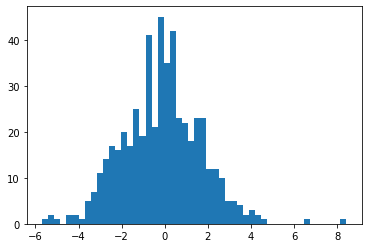

In [59]:
plt.hist(pred_avg_cel-y_avg_cel, bins = 50)

So we see that we are doinh super mega good! Most errors are in the max side, but more than 60% is within 1.5 C of difference, probably better than prediction